# Ex4: PCA
- Cho tập tin Iris.xls. Đọc dữ liệu vào dataframe
- Tìm correlation matrix, trực quan hóa
- Áp dụng PCA: giảm chiều dữ liệu còn 2 chiều (gốc là 4 chiều, không tính cột loại iris)
- Trực quan hóa dữ liệu sau khi giảm chiều

In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel("Iris.xls")
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [4]:
corr = data.corr()
corr

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [5]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
A = data[['sepallength','sepalwidth','petallength','petalwidth']].values
A[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
[4.22484077 0.24224357]


In [9]:
# transform data
B = pca.transform(A)
print(B[0:5])

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]


In [10]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [11]:
import matplotlib.pyplot as plt

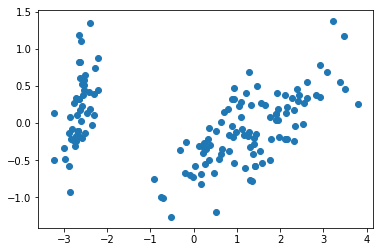

In [12]:
plt.scatter(B[:,0], B[:,1])
plt.show()

In [13]:
principalDf = pd.DataFrame(data = B
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [14]:
import numpy as np

In [15]:
y = np.array(data.iris)
y = pd.DataFrame(data = y, columns = ['types'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,types
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


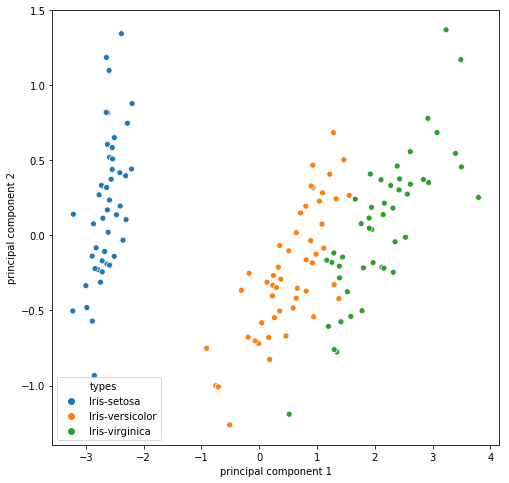

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="principal component 1", y="principal component 2", data = finalDf, hue='types')
plt.show()